<class 'numpy.ndarray'>


 [[  9   0   0   3   1   2]
 [  1  82   1   4   7   5]
 [  0   1 141   1   3   8]
 [  2   6   8 145   0   7]
 [  0  17   1   0  66   6]
 [  0   1   5   2   4  47]]


 The accuracy in prediction by Random Forest Classifier is:  0.8361774744027304
<class 'numpy.ndarray'>


 [[ 14   0   0   1   0   0]
 [  0  96   0   0   2   2]
 [  0   2 149   3   0   0]
 [  8   2   5 152   0   1]
 [  0  21   2   1  63   3]
 [  1   1   7   8  10  32]]


 The accuracy in prediction by Random Forest Classifier is:  0.863481228668942
<class 'numpy.ndarray'>


 [[ 14   0   1   0   0   0]
 [  0  91   1   0   4   4]
 [  1   1 149   0   0   3]
 [  0   4   4 160   0   0]
 [  0  18   3   1  62   6]
 [  4   1   4   0   3  47]]


 The accuracy in prediction by Random Forest Classifier is:  0.8924914675767918
<class 'numpy.ndarray'>


 [[ 12   0   1   1   0   1]
 [  0  94   3   2   1   0]
 [  1   0 150   3   0   0]
 [  1   2  12 153   0   0]
 [  0  14   0   2  72   2]
 [  6   1   3   0   8  

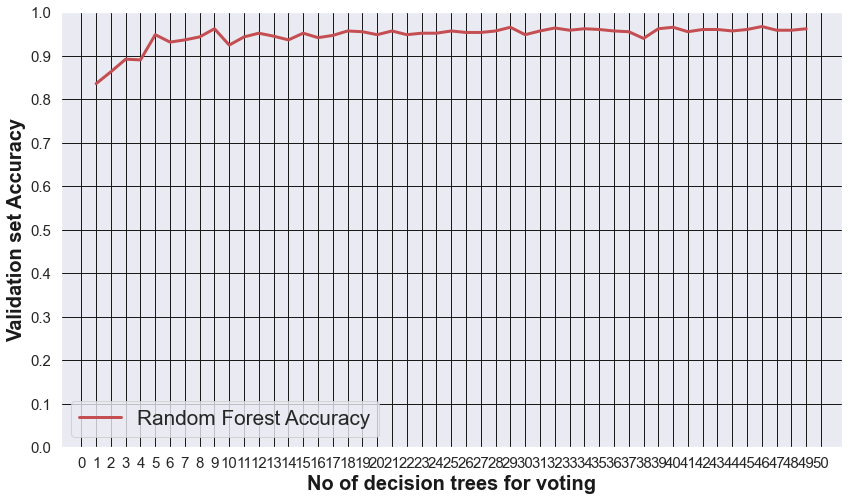

[16, 14, 17, 13, 16, 20, 16, 15, 17, 16, 19, 14, 15, 14, 15, 15, 14, 17, 14, 14, 14, 16, 15, 19, 16, 15, 16, 15, 17, 14, 14, 14, 14, 16, 17, 16, 17, 17, 14, 15, 15, 15, 14, 16, 17, 16, 16, 18, 14]


In [3]:
import os
import pandas as pd
#import tensorflow
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

merged_data = pd.read_csv('dataset_6classses_rms.csv')
merged_data = merged_data.drop(merged_data.columns[0], axis = 1)
um_cols = ['Bearing 1']
merged_data.columns = ['Bearing 1-1','Bearing 1-2','Bearing 2-1','Bearing 2-2', 'Bearing 3-1','Bearing 3-2','Bearing 4-1','Bearing 4-2', 'FaultType']
merged_data.reset_index(drop=True, inplace=True)

num_cols = ['Bearing 1-1','Bearing 1-2','Bearing 2-1','Bearing 2-2', 'Bearing 3-1','Bearing 3-2','Bearing 4-1','Bearing 4-2']

dataset_train = merged_data 

dataset = merged_data.values
scaler = StandardScaler()
X = dataset[:,0:8].astype(float)
X = scaler.fit_transform(X)
Y = dataset[:,8].astype(int)


# X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y , train_size=0.7, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y , train_size=0.7, shuffle=True)

trees_count = []
forest_acc = []

for n_est in range(1,50,1):

    # rand_forest = RandomForestClassifier(criterion="entropy", random_state=0, max_features='sqrt',n_estimators=n_est, bootstrap=True)
    rand_forest = RandomForestClassifier(criterion="entropy", max_features='sqrt',n_estimators=n_est, bootstrap=True)

    model = rand_forest.fit(X_train,y_train)

    pred = model.predict(X_test)

    pred_acc = confusion_matrix(y_test, pred)
    # pred_recall = recall_score(y_test, pred)
    print(type(pred_acc))

    cm_trace =  np.trace(pred_acc)
    elements_sum = np.sum(pred_acc)

    accuracy = cm_trace/elements_sum

    forest_acc.append(accuracy)
    trees_count.append(n_est)

    print('\n\n',pred_acc)
    print('\n\n The accuracy in prediction by Random Forest Classifier is: ',accuracy)


fig = plt.figure("Figure",figsize=(14,8))

subplot1 = fig.add_subplot(1,1,1)
plt.plot(trees_count,forest_acc, '-r',label = 'Random Forest Accuracy', lw = 3)

plt.xlabel('No of decision trees for voting', color = 'k', fontsize = 20, fontweight = 'bold')
plt.ylabel('Validation set Accuracy', color = 'k', fontsize = 20, fontweight = 'bold')
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.xticks(np.arange(0,51,1), fontsize = 15)
plt.yticks(np.arange(0,1.1,0.1),fontsize = 15)

plt.grid(True, color = 'k')

plt.show()

print([estimator.tree_.max_depth for estimator in rand_forest.estimators_])



